# Theoretical

#Q1 Can we use Bagging for regression problems?
-> Yes, Bagging can be used for both classification and regression problems. In regression, models like Bagging Regressor combine predictions by averaging outputs from base models.

#Q2 What is the difference between multiple model training and single model training?
-> Single model training involves building one predictive model, while multiple model training (ensemble methods) combines predictions from several models to improve performance and robustness.

#Q3 Explain the concept of feature randomness in Random Forest.
-> In Random Forest, feature randomness refers to selecting a random subset of features for each split in a tree, which increases diversity among trees and reduces correlation.

#Q4 What is OOB (Out-of-Bag) Score?
-> OOB Score is an internal validation method in Random Forest where each tree is tested on data not used in its training (about 1/3rd of the data), providing an unbiased estimate of model performance.

#Q5 How can you measure the importance of features in a Random Forest model?
-> Feature importance is measured by looking at the decrease in impurity (like Gini index) or using permutation importance, which evaluates how model performance degrades when a feature is randomly shuffled.

#Q6 Explain the working principle of a Bagging Classifier.
-> A Bagging Classifier builds multiple instances of the same model on different subsets of data sampled with replacement (bootstrap) and combines their outputs via majority voting.

#Q7 How do you evaluate a Bagging Classifier’s performance?
-> Using metrics like accuracy, precision, recall, F1 score on a test set or through cross-validation. OOB score can also be used for evaluation.

#Q8 How does a Bagging Regressor work?
-> It trains multiple regressors on different bootstrap samples and averages their predictions to form the final output, reducing variance.

#Q9 What is the main advantage of ensemble techniques?
-> They improve accuracy, reduce overfitting, and increase model robustness by combining multiple models.

#Q10 What is the main challenge of ensemble methods?
-> They can be computationally expensive and complex to interpret compared to individual models.

#Q11 Explain the key idea behind ensemble techniques.
-> The core idea is to combine predictions from multiple models to achieve better generalization than any single model.

#Q12 What is a Random Forest Classifier?
-> It is an ensemble model that builds multiple decision trees and outputs the class that has the majority vote among the trees.

#Q13 What are the main types of ensemble techniques?
->
- Bagging

- Boosting

- Stacking

- Voting

#Q14 What is ensemble learning in machine learning?
-> It is a technique where multiple models (weak learners) are trained and combined to solve the same problem and improve overall performance.

#Q15 When should we avoid using ensemble methods?
-> When interpretability is crucial or when the dataset is small and simple models perform sufficiently well.

#Q16 How does Bagging help in reducing overfitting?
-> By averaging predictions over diverse models trained on varied subsets of data, it reduces variance and thus overfitting.

#Q17 Why is Random Forest better than a single Decision Tree?
-> Random Forest reduces variance and overfitting by combining multiple trees trained on different data and feature subsets.

#Q18 What is the role of bootstrap sampling in Bagging?
-> It creates diverse training datasets by sampling with replacement, ensuring variability among models.

#Q19 What are some real-world applications of ensemble techniques?
->
- Spam detection

- Fraud detection

- Medical diagnosis

- Credit scoring

-Stock market prediction

#Q20 What is the difference between Bagging and Boosting?

-> Bagging builds models independently in parallel and combines them (focus: variance reduction).

Boosting builds models sequentially with each focusing on correcting the errors of the previous (focus: bias reduction).



# Practical

In [3]:
# 21. Train a Bagging Classifier using Decision Trees on a sample dataset and print model accuracy.
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)
y_pred = bagging_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [4]:
# 22. Train a Bagging Regressor using Decision Trees and evaluate using Mean Squared Error (MSE).
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

bagging_reg = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42)
bagging_reg.fit(X_train, y_train)
y_pred = bagging_reg.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 3333.257117117116


In [5]:
# 23. Train a Random Forest Classifier on the Breast Cancer dataset and print feature importance scores.
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
print("Feature Importances:", rf_clf.feature_importances_)

Feature Importances: [0.03971058 0.01460399 0.05314639 0.04277978 0.00816485 0.01140166
 0.08321459 0.0902992  0.00443533 0.00443395 0.01951684 0.00459978
 0.00868228 0.04355077 0.00464415 0.0036549  0.00701442 0.00504716
 0.00371411 0.00658253 0.08127686 0.01649014 0.07138828 0.12319232
 0.01033481 0.01580059 0.03174022 0.17229521 0.01310266 0.00518165]


In [10]:
# 24. Train a Random Forest Regressor and compare its performance with a single Decision Tree.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

from sklearn.tree import DecisionTreeRegressor
single_tree = DecisionTreeRegressor(random_state=42)
single_tree.fit(X_train, y_train)
y_pred_tree = single_tree.predict(X_test)

# Evaluate Random Forest
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)
print("Random Forest - MSE:", rf_mse)
print("Random Forest - R2:", rf_r2)

# Evaluate Single Decision Tree
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_r2 = r2_score(y_test, y_pred_tree)
print("Decision Tree - MSE:", tree_mse)
print("Decision Tree - R2:", tree_r2)

Random Forest - MSE: 0.0337993006993007
Random Forest - R2: 0.8561877028714108
Decision Tree - MSE: 0.04895104895104895
Decision Tree - R2: 0.791718684977112


In [11]:
# 25. Compute the Out-of-Bag (OOB) Score for a Random Forest Classifier.
oob_rf = RandomForestClassifier(oob_score=True, random_state=42)
oob_rf.fit(X_train, y_train)
print("OOB Score:", oob_rf.oob_score_)

OOB Score: 0.960093896713615


In [13]:
# 26. Train a Bagging Classifier using SVM as a base estimator and print accuracy.
from sklearn.svm import SVC

bagging_svm = BaggingClassifier(estimator=SVC(probability=True), n_estimators=10, random_state=42)
bagging_svm.fit(X_train, y_train)
y_pred = bagging_svm.predict(X_test)
print("Bagging SVM Accuracy:", accuracy_score(y_test, y_pred))


Bagging SVM Accuracy: 0.951048951048951


In [14]:
# 27. Train a Random Forest Classifier with different numbers of trees and compare accuracy.
for n in [10, 50, 100]:
    model = RandomForestClassifier(n_estimators=n, random_state=42)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print(f"Accuracy with {n} trees: {acc}")

Accuracy with 10 trees: 0.951048951048951
Accuracy with 50 trees: 0.972027972027972
Accuracy with 100 trees: 0.965034965034965


In [17]:
# 28. Train a Bagging Classifier using Logistic Regression as a base estimator and print AUC score.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

bagging_logreg = BaggingClassifier(estimator=LogisticRegression(max_iter=5000), n_estimators=10, random_state=42)
bagging_logreg.fit(X_train, y_train)
auc = roc_auc_score(y_test, bagging_logreg.predict_proba(X_test)[:,1])
print("Bagging Logistic Regression AUC:", auc)

Bagging Logistic Regression AUC: 0.9970869746150646


In [18]:
# 29. Train a Random Forest Regressor and analyze feature importance scores.
print("Random Forest Feature Importances:", rf_reg.feature_importances_)

Random Forest Feature Importances: [0.00406077 0.01755896 0.00312659 0.00630203 0.00342732 0.00070398
 0.00191186 0.3209753  0.00201282 0.00303705 0.0072529  0.00316509
 0.00361855 0.01198089 0.00438724 0.00170767 0.00495764 0.00164607
 0.00261106 0.00564809 0.05222607 0.02772496 0.13801831 0.08283969
 0.00745659 0.00382889 0.01469913 0.25420402 0.00649847 0.00241198]


In [20]:
# 30 Train an ensemble model using both Bagging and Random Forest and compare accuracy.
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the Breast Cancer dataset
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Retrain the Bagging Classifier on the Breast Cancer dataset
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_clf.fit(X_train, y_train)

# Now predict and calculate accuracy
rf_acc = rf_clf.score(X_test, y_test)
bag_acc = bagging_clf.score(X_test, y_test)  # This should work without error now
print("Random Forest Accuracy:", rf_acc)
print("Bagging Classifier Accuracy:", bag_acc)

Random Forest Accuracy: 0.965034965034965
Bagging Classifier Accuracy: 0.9440559440559441


In [21]:
# 31. Train a Random Forest Classifier and tune hyperparameters using GridSearchCV.
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100], 'max_depth': [None, 10, 20]}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_rf.fit(X_train, y_train)
print("Best Parameters:", grid_rf.best_params_)

Best Parameters: {'max_depth': None, 'n_estimators': 50}


In [22]:
# 32. Train a Bagging Regressor with different numbers of base estimators and compare performance.
for n in [5, 10, 20]:
    reg = BaggingRegressor(n_estimators=n, random_state=42)
    reg.fit(X_train, y_train)
    mse = mean_squared_error(y_test, reg.predict(X_test))
    print(f"MSE with {n} estimators: {mse}")


MSE with 5 estimators: 0.04167832167832168
MSE with 10 estimators: 0.040489510489510494
MSE with 20 estimators: 0.03409090909090909


In [23]:
# 33. Train a Random Forest Classifier and analyze misclassified samples.
misclassified = X_test[y_test != rf_clf.predict(X_test)]
print("Misclassified Samples:", misclassified)

Misclassified Samples: [[1.334e+01 1.586e+01 8.649e+01 5.200e+02 1.078e-01 1.535e-01 1.169e-01
  6.987e-02 1.942e-01 6.902e-02 2.860e-01 1.016e+00 1.535e+00 1.296e+01
  6.794e-03 3.575e-02 3.980e-02 1.383e-02 2.134e-02 4.603e-03 1.553e+01
  2.319e+01 9.666e+01 6.149e+02 1.536e-01 4.791e-01 4.858e-01 1.708e-01
  3.527e-01 1.016e-01]
 [1.380e+01 1.579e+01 9.043e+01 5.841e+02 1.007e-01 1.280e-01 7.789e-02
  5.069e-02 1.662e-01 6.566e-02 2.787e-01 6.205e-01 1.957e+00 2.335e+01
  4.717e-03 2.065e-02 1.759e-02 9.206e-03 1.220e-02 3.130e-03 1.657e+01
  2.086e+01 1.103e+02 8.124e+02 1.411e-01 3.542e-01 2.779e-01 1.383e-01
  2.589e-01 1.030e-01]
 [1.396e+01 1.705e+01 9.143e+01 6.024e+02 1.096e-01 1.279e-01 9.789e-02
  5.246e-02 1.908e-01 6.130e-02 4.250e-01 8.098e-01 2.563e+00 3.574e+01
  6.351e-03 2.679e-02 3.119e-02 1.342e-02 2.062e-02 2.695e-03 1.639e+01
  2.207e+01 1.081e+02 8.260e+02 1.512e-01 3.262e-01 3.209e-01 1.374e-01
  3.068e-01 7.957e-02]
 [1.448e+01 2.146e+01 9.425e+01 6.482e+02 9.

In [24]:
# 34. Train a Bagging Classifier and compare its performance with a single Decision Tree Classifier.
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("Decision Tree Accuracy:", dt.score(X_test, y_test))
print("Bagging Accuracy:", bagging_clf.score(X_test, y_test))


Decision Tree Accuracy: 0.951048951048951
Bagging Accuracy: 0.9440559440559441


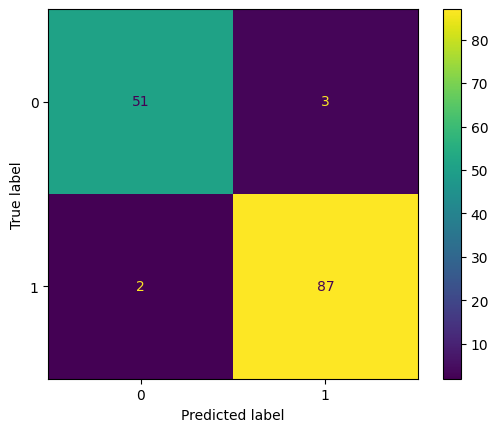

In [25]:
# 35. Train a Random Forest Classifier and visualize the confusion matrix.
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(rf_clf, X_test, y_test)



In [27]:
# 36. Train a Stacking Classifier using Decision Trees, SVM, and Logistic Regression, and compare accuracy.
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[('dt', DecisionTreeClassifier()), ('svm', SVC(probability=True)), ('lr', LogisticRegression(max_iter= 5000))],
    final_estimator=LogisticRegression()
)
stacking_clf.fit(X_train, y_train)
print("Stacking Classifier Accuracy:", stacking_clf.score(X_test, y_test))


Stacking Classifier Accuracy: 0.965034965034965


In [28]:
# 37. Train a Random Forest Classifier and print the top 5 most important features.
import numpy as np
indices = np.argsort(rf_clf.feature_importances_)[::-1][:5]
print("Top 5 Features:", indices)


Top 5 Features: [27 23  7  6 20]


In [29]:
# 38. Train a Bagging Classifier and evaluate performance using Precision, Recall, and F1-score.
from sklearn.metrics import classification_report
print(classification_report(y_test, bagging_clf.predict(X_test)))


              precision    recall  f1-score   support

           0       0.91      0.94      0.93        54
           1       0.97      0.94      0.95        89

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



In [30]:
# 39. Train a Random Forest Classifier and analyze the effect of max_depth on accuracy.
for depth in [None, 5, 10]:
    model = RandomForestClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    print(f"Accuracy with max_depth={depth}: {model.score(X_test, y_test)}")

Accuracy with max_depth=None: 0.965034965034965
Accuracy with max_depth=5: 0.965034965034965
Accuracy with max_depth=10: 0.965034965034965


In [32]:
# 40. Train a Bagging Regressor using different base estimators (DecisionTree and KNeighbors) and compare performance.
from sklearn.neighbors import KNeighborsRegressor

for base in [DecisionTreeRegressor(), KNeighborsRegressor()]:
    model = BaggingRegressor(estimator=base, n_estimators=10, random_state=42)
    model.fit(X_train, y_train)
    print(f"Base {type(base).__name__} MSE:", mean_squared_error(y_test, model.predict(X_test)))


Base DecisionTreeRegressor MSE: 0.040489510489510494
Base KNeighborsRegressor MSE: 0.027854545454545455


In [33]:
# 41. Train a Random Forest Classifier and evaluate its performance using ROC-AUC Score.
from sklearn.metrics import roc_auc_score
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_clf.predict_proba(X_test)[:,1]))


Random Forest ROC-AUC: 0.9962546816479401


In [34]:
# 42. Train a Bagging Classifier and evaluate its performance using cross-validation.
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(bagging_clf, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)


Cross-Validation Scores: [0.92982456 0.93859649 0.97368421 0.93859649 0.97345133]


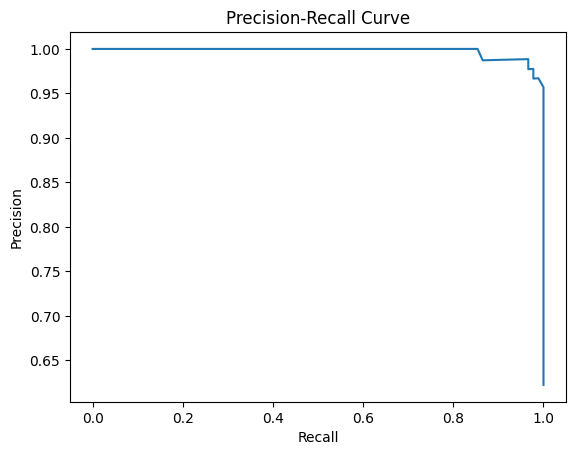

In [35]:
# 43. Train a Random Forest Classifier and plot the Precision-Recall curve.
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

probs = rf_clf.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, probs)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [37]:
# 44. Train a Stacking Classifier with Random Forest and Logistic Regression and compare accuracy.
stk_clf = StackingClassifier(
    estimators=[('rf', RandomForestClassifier()), ('lr', LogisticRegression(max_iter=5000))],
    final_estimator=LogisticRegression()
)
stk_clf.fit(X_train, y_train)
print("Stacking Accuracy:", stk_clf.score(X_test, y_test))


Stacking Accuracy: 0.972027972027972


In [38]:
# 45. Train a Bagging Regressor with different levels of bootstrap samples and compare performance.
for bootstrap in [True, False]:
    model = BaggingRegressor(bootstrap=bootstrap, random_state=42)
    model.fit(X_train, y_train)
    print(f"Bootstrap={bootstrap} MSE:", mean_squared_error(y_test, model.predict(X_test)))


Bootstrap=True MSE: 0.040489510489510494
Bootstrap=False MSE: 0.0486013986013986
